In [3]:
!pip3 install nltk

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.4 MB 483 kB/s eta 0:00:01
     |████████████████████████████████| 82 kB 628 kB/s  eta 0:00:01
     |████████████████████████████████| 298 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 660 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 226 kB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1435512 sha256=1793d8bc390669d53ff9de07dce6fc28fa51187b2c021edd1b0bf02b74244373
  Stored in directory: /home/newdrone18/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk


### 말뭉치¶

- 말뭉치(corpus)는 자연어 분석 작업을 위해 만든 샘플 문서 집합을 말한다. 단순히 소설, 신문 등의 문서를 모아놓은 것도 있지만 품사. 형태소, 등의 보조적 의미를 추가하고 쉬운 분석을 위해 구조적인 형태로 정리해 놓은 것을 포함한다. NLTK 패키지의 corpus 서브패키지에서는 다양한 연구용 말뭉치를 제공한다. 이 목록은 전체 corpus의 일부일 뿐이다. 말뭉치 자료는 설치시에 제공되지 않고 download 명령으로 사용자가 다운로드 받아야 한다. nltk.download("book") 명령을 실행하면 NLTK 패키지 사용자 설명서에서 요구하는 대부분의 말뭉치를 다운로드 받아준다.

- 말뭉치가 없을 때는 웹크롤링이나 샘플 말뭉치를 구하여 사용한다

In [4]:
%%time
import nltk
nltk.download('book')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/newdrone18/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/newdrone18/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/newdrone18/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/newdrone18/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/newdrone18/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/newdrone18/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_tree

CPU times: user 5.3 s, sys: 2.48 s, total: 7.77 s
Wall time: 3min 47s


[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection book
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/newdrone18/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /home/newdrone18/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/newdrone18/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 구텐베르그 말뭉치 목록
- 저작권이 말소된 책들을 모아 말뭉치를 만듬

In [5]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:702])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


### 토큰화
- 토큰화
    - 말뭉치를 토큰이라고 불리는 작은 단위로 나누는 행위
- 토큰
    - 문장, 단어, 형태소 등 분석에 있어서 의미를 가지는 단위
- 토큰의 명칭
    - 토큰의 이름은 실제 토큰의 활용과 관계가 없다.
    - 숫자 혹은 기호로 나타내거나
    - 품사 등을 덧붙여서 쓰는 경우도 있다

### 토큰의 종류
- 영어 : 의미가 같은 정규화된 단어

i am a boy => i + am + a + boy + .
- 한국어 : 의미가 같은 정규화된 형태소

나는 소년이다 => 나 + 는 + 소년 + 이다.

### 형태소
- 형태소
    - 의미를 가진 작은 말의 단위
- 한국어 형태소
    - 자립 형태소 : 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등
    - 의존 형태소 : 접사, 어미, 조사, 어간 등    

### 정규화
    - 의미와 쓰임이 같은 단어를 같은 토큰으로 표시(Normalization)
    - 다르면 다른 토큰으로 표시
    - 대소문자 통합(case removal)
    - 어간 추출(stemming)
    - 표제어 추출(lemmaization)
    - 품사 부착(part-of-speech tagging)(ex fly/n fly/v)
    - 불용어(stopwords)

### 어간추출(stemming)
    - 단어를 어간과 접사로 분리하여 단순히 접사를 삭제하거나 교체
        - 어간(stem) : 단어의 의미를 담고 있는 핵심 부분
        - 접사(affix) : 단어에 부가적인 의미를 주는 부분
    - 단순 알고리즘 사용
        - 포터 알고리즘
        - 랭케스터 알고리즘
        

### 표제어 추출
    - 표제어 추출(Lemmatization)
    - 기본 사전형 단어로 변형
    - am, was, been etc =? be
    - has, had => have
    - 사전 정보(WordNet) 사용

### 품사 부착
    - 품사(POS : part of speech)
        - 단어의 쓰임에 따른 구분
    - 동일한 철자의 단어가 다른 의미나 다른 품사로 쓰이는 경우
        - 다른 토큰으로 토큰화 해야 한다.
        

### 불용어(stop words)
    - 분석의 필요성이 없는 단어
    - 모든 문서에서 너무 자주 쓰이는 단어
    - 너무 드물게 나타나는 단어
    - EX) 조사

In [10]:
sent = emma_raw[50:196]
print(sent)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence


In [11]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence']

In [12]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly','flies','flying','flew','flown']

print("Porter Stemmer :",[st1.stem(w) for w in words])
print("Lancaster Stemmer:",[st2.stem(w) for w in words])

Porter Stemmer : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


In [14]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
# pos = optional argument
[lm.lemmatize(w,pos='v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [15]:
from nltk.tag import pos_tag

sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [16]:
def tokenizer(doc):
    return ['/'.join(p) for p in tagged_list]
tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [18]:
from nltk.corpus import stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Nltk 빈도 분석
- 두 가지 클래스 사용
    - Text 클래스
    - FreqDist 클래스

### Text Class
- 문서분석에 유용한 여러가지 함수를 제공한다.

    - plot : 단어 빈도 그래프
    - dispersion_plot : 단어 위치 그래프
    - concordance : 단어 문맥 인쇄
    - similar : 유사 단어 검색

In [28]:
from nltk import Text
import matplotlib.pyplot as plt

text = Text(word_tokenize(emma_raw))

#### 단어 빈도 그래프

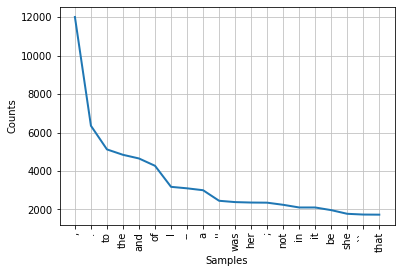

In [29]:
text.plot(20)
plt.show()

/home/newdrone18/.local/lib/python3.6/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded " "(please install Tkinter library).")


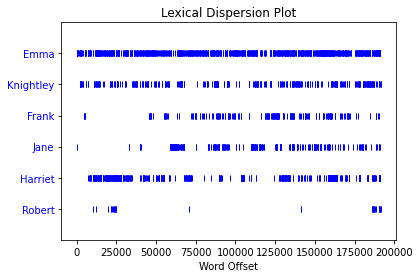

In [30]:
text.dispersion_plot(["Emma","Knightley","Frank","Jane","Harriet","Robert"])

#### 단어 문맥 인쇄
- concordance 매서드로 단어가 사용된 위치를 직접 표시하면 문맥이 어떤지 볼 수 있다. 여기서 문맥은 해당 단어의 앞과 뒤에 사용된 단어를 뜻한다

In [31]:
text.concordance("Emma")

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

 #### 유사 단어 검색
    - similar 메서드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단언들을 찾는다.

In [32]:
text.similar("emma",1)

she


In [33]:
text.common_contexts(['Emma',"she"],1)

said_i


 ### FreqDist 클래스
    - FreqDist 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다
    - Text 클래스의 vocab 메서드로 추출할 수 있다.
    - 토큰 리스트를 넣어서 직접 만들 수 도 있다.
    - 빈도 분석에 유용한 여러가지 메서드를 제공한다.
        - N : 빈도(횟수)
        - freq : 빈도(퍼센트)
        - most_common : 가장 많이 나오는 단어
        - plot : 가장 많이 나오는 단어 플롯

In [34]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

#### 토큰 리스트에서 생성
- 다음 코드에서는 엠마 말뭉치에서 사람의 이름(NNP)만 모아서 FreqDist 클래스 객체를 만들었다.
- 품사 태그에서 NNP 고유대명사이면서 필요없는 단어는 제거하였다.

In [35]:
from nltk import FreqDist
stopwords = ['Mr.','Mrs.','Miss','Mr','Mrs','Dear']
emma_tokens = pos_tag(word_tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [36]:
fd_names

FreqDist({'Emma': 829, 'Harriet': 477, 'Weston': 429, 'Elton': 374, 'Knightley': 373, 'Woodhouse': 307, 'Jane': 295, 'Fairfax': 232, 'Churchill': 213, 'Frank': 207, ...})

#### 단어 빈도 분석
- FreqDist 클래스는 단어를 키, 출현빈도를 값 으로 가지는 딕셔너리와 유사하다. 다음 코드는 전체 단어의 수 , "엠마" 라는 단어의 횟수, 확률을 각각 계산한다.

In [37]:
fd_names.N(), fd_names['Emma'], fd_names.freq('Emma')

(6924, 829, 0.11972848064702483)

- most_common  메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.

In [38]:
fd_names.most_common(5)

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

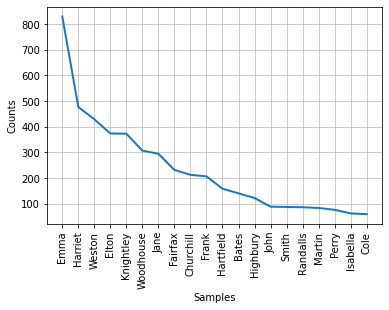

In [39]:
fd_names.plot(20)
plt.show()

## wordcloud

In [40]:
!pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 364 kB 59 kB/s eta 0:00:01


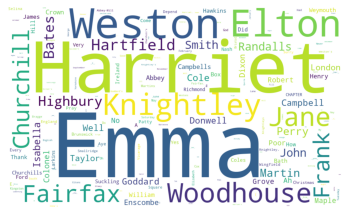

In [41]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()

 # 한글 자연어 처리

In [42]:
!pip3 install konlpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 19.4 MB 72 kB/s eta 0:00:014
     |████████████████████████████████| 86 kB 166 kB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 165 kB/s ta 0:00:012
     |████████████████████████████████| 5.5 MB 154 kB/s eta 0:00:01
     |████████████████████████████████| 147 kB 92 kB/s eta 0:00:01


### KONLPY
- 샘플 말뭉치
    - kolaw : 헌법 말뭉치
    - kobill : 법안 말뭉치
- 한글 형태소 분석기
    - KoNPLpy : 는 다양한 형태소 분석, 태깅 라이브러리를 파이썬에서 쉽게 사용할 수 있도록 모아놓았다.

#### 형태소 분석 기능
- Hannanum: 한나눔 -> 카이스트
- Kkma : 꼬꼬마 -> 서울대학교
- Komoran : 코모란 -> Shineware에서 개발
- Mecab : 멬브 -> 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정
- Open Korean Text : 오픈소스 한국어 분석기 -> 과거 트위터 형태소 분석기
- nouns : 명사추출
- morphs : 형태소 추출
- pos : 품사부착

#### 헌법 말뭉치

In [2]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [3]:
c = kolaw.open('constitution.txt').read()
print(c[:450])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       


#### 법안 말뭉치

In [5]:
from konlpy.corpus import kobill
kobill.fileids()

['1809893.txt',
 '1809898.txt',
 '1809890.txt',
 '1809891.txt',
 '1809895.txt',
 '1809899.txt',
 '1809897.txt',
 '1809894.txt',
 '1809896.txt',
 '1809892.txt']

In [6]:
d = kobill.open('1809890.txt').read()
print(d[:400])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제63조제2항제4호).



#### 형태소 분석기 생성

In [8]:
from konlpy.tag import *

hananum = Hannanum()
kkma = Kkma()
okt = Okt()

In [11]:
komoran = Komoran()
#mecab = Mecab()

#### 명사 추출
- 문서에서만 명사 추출

In [12]:
hananum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [13]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [14]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

In [15]:
komoran.nouns(c[:40])

['대한민국', '헌법', '역사', '전통', '국민', '운동']

#### 형태소 추출
- morphs 사용

In [16]:
hananum.morphs(c[:40])

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

In [17]:
kkma.morphs(c[:40])

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [18]:
okt.morphs(c[:40])

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [19]:
komoran.morphs(c[:40])

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

#### 품사부착
- pos
- tagset 속성으로 확인

In [20]:
hananum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [21]:
hananum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [22]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

In [23]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [24]:
okt.pos(c[:40])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa')]

In [25]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [27]:
komoran.pos(c[:40])

[('대한민국', 'NNP'),
 ('헌법', 'NNP'),
 ('유구', 'XR'),
 ('하', 'XSA'),
 ('ㄴ', 'ETM'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKB'),
 ('빛나', 'VV'),
 ('는', 'ETM'),
 ('우리', 'NP'),
 ('대하', 'VV'),
 ('ㄴ', 'ETM'),
 ('국민', 'NNP'),
 ('은', 'JX'),
 ('3', 'SN'),
 ('·', 'SP'),
 ('1', 'SN'),
 ('운동', 'NNP'),
 ('으로', 'JKB')]

In [28]:
komoran.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

#### 빈도 분석
- nltk의 기능을 사용하여 빈도 분석 가능

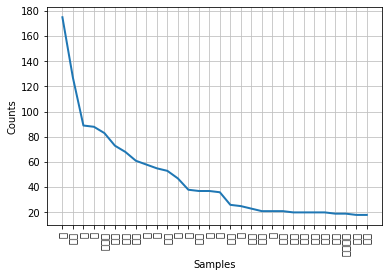

In [31]:
from nltk import Text

kolaw = Text(okt.nouns(c))
kolaw.plot(30)


In [35]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable


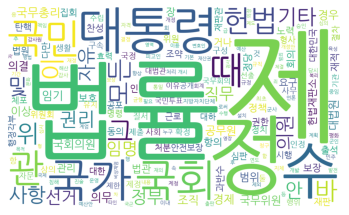

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path="/usr/share/fonts/truetype/NanumGothic.ttf"
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)

plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis('off')
plt.show()


## Konlpy사용자 사전 추가

#### Komoran 사용자 사전 추가

In [40]:
sentence = '자유 한국당, "박근혜-최순실 국정농단 테블릿 PC는 거짓"이라고 주장'

In [41]:
from konlpy.tag import Komoran

komoran = Komoran()
komoran.pos(sentence)

[('자유', 'NNG'),
 ('한국당', 'NNP'),
 (',', 'SP'),
 ('"', 'SS'),
 ('박근혜', 'NNP'),
 ('-', 'SS'),
 ('최순', 'NNP'),
 ('실', 'NNP'),
 ('국정', 'NNG'),
 ('농', 'NNG'),
 ('단', 'NNG'),
 ('테블릿', 'NA'),
 ('PC', 'SL'),
 ('는', 'JX'),
 ('거짓', 'NNG'),
 ('"', 'SS'),
 ('이라고', 'JKQ'),
 ('주장', 'NNG')]

- 최순실 국정농단 등등 제대로 품사태깅이 되지 않는다.
- 그러므로 텍스트 파일을 만든후 단어 그리고 탭을 한 후에 품사명을 넣어준다
- 최순실   NNP

In [43]:
!cat './user_dic.txt'

최순실	NNP


In [44]:
komoran = Komoran(userdic='./user_dic.txt')
komoran.pos(sentence)

[('자유', 'NNG'),
 ('한국당', 'NNP'),
 (',', 'SP'),
 ('"', 'SS'),
 ('박근혜', 'NNP'),
 ('-', 'SS'),
 ('최순실', 'NNP'),
 ('국정', 'NNG'),
 ('농', 'NNG'),
 ('단', 'NNG'),
 ('테블릿', 'NA'),
 ('PC', 'SL'),
 ('는', 'JX'),
 ('거짓', 'NNG'),
 ('"', 'SS'),
 ('이라고', 'JKQ'),
 ('주장', 'NNG')]

#### Hannanum 사용자 사전 추가¶

In [45]:
from konlpy.tag import Hannanum

hananum = Hannanum()
hananum.pos(sentence)

[('자유', 'N'),
 ('한국당,', 'N'),
 ('"박근혜-최순실', 'N'),
 ('국정농단', 'N'),
 ('테블릿', 'N'),
 ('PC', 'F'),
 ('는', 'J'),
 ('거짓', 'N'),
 ('"', 'S'),
 ('이', 'J'),
 ('라', 'E'),
 ('고', 'J'),
 ('주장', 'N')]

- Hannanum 형태소 분석기에서 사용자 사전을 추가 하는 방법은 dic_user.txt 파일에 원하는 정보를 추가하는 것이다. KoNLPy 패키지가 있는 위치로 이동하면, java/data/kE 라는 디렉토리를 확인 할 수 있다. KoNLPy패키지의 위치는 설치 환경마다 다르므로 스스로 찾아야 한다

- 위치 ~/.local/lib/python3.6/site-packages/konlpy/java/data/kE

In [47]:
# !cp {dic_user} {dic_user}.org
# !echo "\n최순실  nq" >> {dic_user}
# !tail {dic_user}

In [46]:
hannanum = Hannanum()
hannanum.pos(sentence)

[('자유', 'N'),
 ('한국당,', 'N'),
 ('"', 'S'),
 ('박근혜', 'N'),
 ('-', 'S'),
 ('최순실', 'N'),
 ('국정농단', 'N'),
 ('테블릿', 'N'),
 ('PC', 'F'),
 ('는', 'J'),
 ('거짓', 'N'),
 ('"', 'S'),
 ('이', 'J'),
 ('라', 'E'),
 ('고', 'J'),
 ('주장', 'N')]

In [48]:
# # 다시 원래대로 복원
# !mv -f {dic_user}.org {dic_user}
# !tail {dic_user}

#### Kkma 사용자 사전 추가 방법

In [49]:
from konlpy.tag import Kkma

kkma = Kkma()
kkma.pos(sentence)

[('자유', 'NNG'),
 ('한국', 'NNG'),
 ('당', 'NNG'),
 (',', 'SP'),
 ('"', 'SS'),
 ('박근', 'NNG'),
 ('혜', 'UN'),
 ('-', 'SW'),
 ('최', 'NNP'),
 ('순', 'NNG'),
 ('실', 'NNG'),
 ('국정', 'NNG'),
 ('농단', 'NNG'),
 ('테', 'NNM'),
 ('블', 'VV'),
 ('ㄹ', 'ETD'),
 ('릿', 'UN'),
 ('PC', 'OL'),
 ('는', 'JX'),
 ('거짓', 'NNG'),
 ('"', 'SS'),
 ('이', 'VCP'),
 ('라고', 'ECD'),
 ('주장', 'NNG')]

- Kkma 형태소 분석기의 사용자 사전을 추가 하는 방법은 직접 분석기가 사용하는 사전에 단어와 품사 정보를 입력하는 것이다. Kkma가 사용하는 사전은 꼬꼬마 형태소 분석기의 kkma-2.0.jar 파일 내에 존재한다. 이 kkma-2.0.jar 파일 역시 KoNLPy 패키지 디렉토리 내 java 디렉토리 안에 있다. 해당 .jar 파일의 내용을 다음과 같이 출력할 수 있다. 다음은 kkma-2.0.jar 파일 내의 사전 관련 파일 만 출력한다.

- ~/.local/lib/python3.6/site-packages/konlpy/java

In [50]:
kkma_jar = "~/.local/lib/python3.6/site-packages/konlpy/java/kkma-2.0.jar"
!jar tf {kkma_jar} | grep \\.dic

dic/ecat/ChemFormula.dic
dic/ecat/CompNoun.dic
dic/ecat/JunkWord.dic
dic/ecat/UOM.dic
dic/ecat/VerbJunkWord.dic
dic/ecat/VerbNoun.dic
dic/kcc.dic
dic/noun.dic
dic/person.dic
dic/prob/lnpr_morp.dic
dic/prob/lnpr_pos.dic
dic/prob/lnpr_pos_g_exp.dic
dic/prob/lnpr_pos_g_morp_inter.dic
dic/prob/lnpr_pos_g_morp_intra.dic
dic/prob/lnpr_syllable_bi.dic
dic/prob/lnpr_syllable_uni_noun.dic
dic/raw.dic
dic/simple.dic
dic/verb.dic


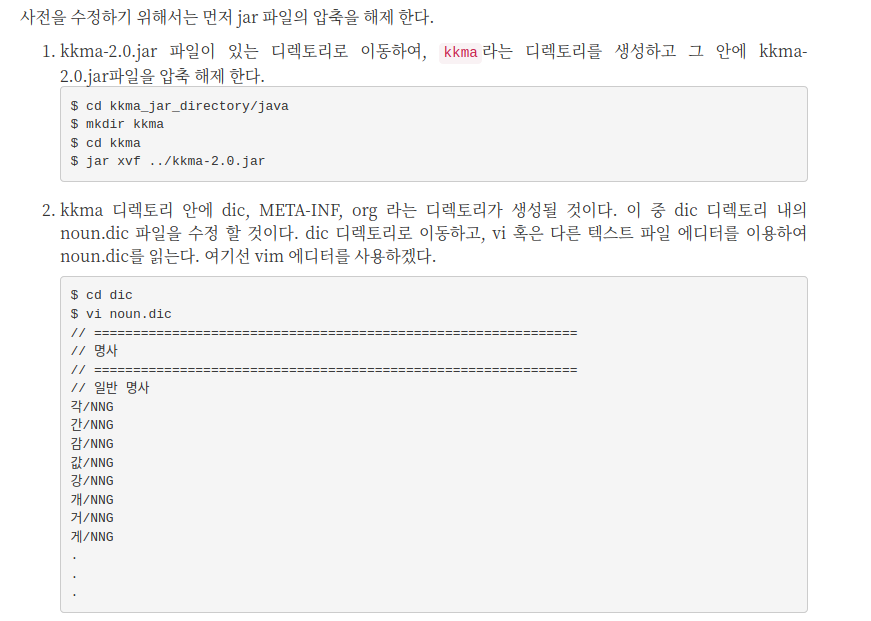

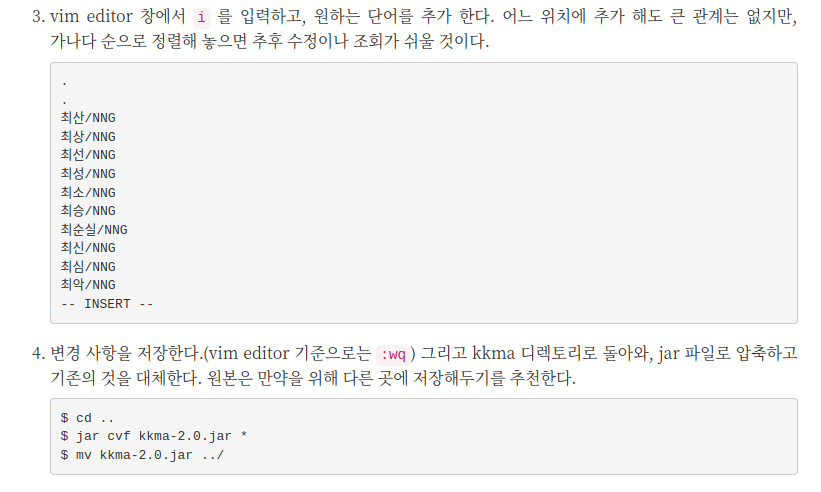

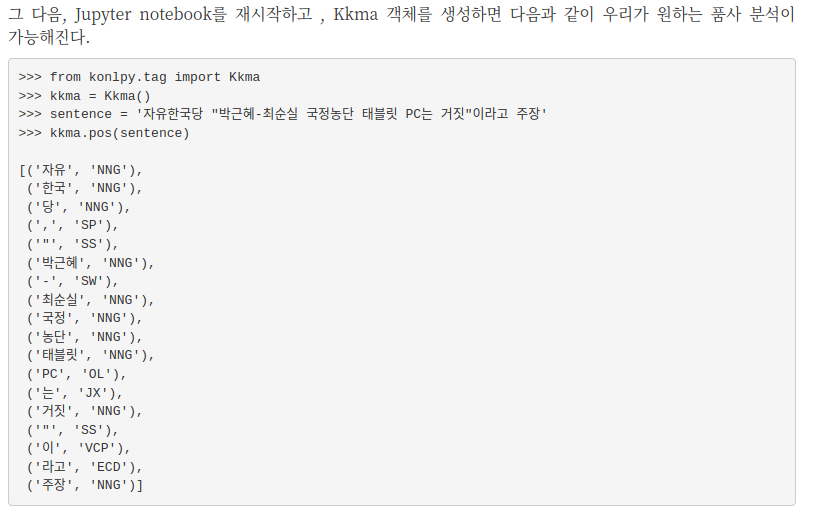

## Scikit-Learn 문서 전처리 기능

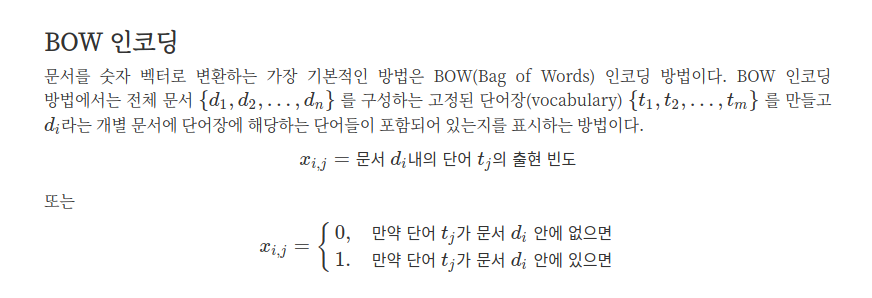

- DictVectorizer : 각 단어의 수를 세어놓은 사전에서 BOW 벡터를 만든다.
- CountVectorizer : 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만든다.
- TfidfVectorizer : 카운터 벡터라이저와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 벡터를 만든다.
- HashingVectorizer : 해시 함수를 사용하여 적은 메모리와 빠른 속도로 BOW 벡터를 만든다.

In [51]:
!pip3 install sklearn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 6.8 MB 89 kB/s eta 0:00:011
     |████████████████████████████████| 26.1 MB 24 kB/s eta 0:00:011
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=6cae9370bef3fa3d32b7811e237ff3a2c641f3384f7be292a993aebba17d79a0
  Stored in directory: /home/newdrone18/.cache/pip/wheels/23/9d/42/5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
